 1a) 10%
 1b) 1%
 1c) 1e-98 %

2) For k-fold corss vaidation, you randomly divide the full sample into a k groups of roughly equal zise, and evaluate the test error on each experement in an independent manner. Relative to LOOCV, it is less computationally expensive as you are running less experiments, that is depending on the value of k. If k=n, than the k-fol corss validation is the same as LOOCV. k-fold also doesnt produce a negative bias like LOOCV does, and is also less sensitive to high leverage points. However, the cons include that it may have less consistent results than LOOCV.

3) Bootstrapping addresses questions as to the range of values that can be expected for any statsitic, while using the variablity that exists within the data. Permutation testing on the other hand, adresses questions as to wht kind of pattern can be expected between variables if there was in fact no statistical relationship between the variables. Bootstrapping, randomly resamples data from the dataset, wihtout disrupting any sort of relationship between variables for any given observation. Permutation test on the other hand, breaks whatever structure may exist between variables of interest.


In [2]:
# function to install the packages 
import_packages <- function(packages) {
  for (package in packages) {
    if (!(package %in% row.names(installed.packages()))) { 
      install.packages(package, repos = "http://cran.us.r-project.org") 
    } 
    library(package, character.only = TRUE) 
  }
}

import_packages(c('tidyverse'))
import_packages(c('boot'))
import_packages(c('ISLR'))
import_packages(c('class'))
setwd("~/Desktop/Grad_School/Classes/Spring_2019/Classes/Data_Science/DataSciencePsychNeuro_CMU85732/Homeworks/hcp_data/")
d<-read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
d %>%
  select( Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)  %>%
  na.omit() -> d1


# -------------------------------
# Question 4
# -------------------------------


# (a)
library(ISLR)
set.seed(46)   # set seed to ensure you always have same random numbers generated
train_ind  = sample(seq_len(nrow(d)),size = 1006)
train =d[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=d[-train_ind,]  
train %>%
  select( Gender, Flanker_Unadj)  %>%
  na.omit() -> train
test %>%
  select( Gender, Flanker_Unadj)  %>%
  na.omit() -> test
ran <- sample(1:nrow(d), 0.9 * nrow(d)) 
target_category <- d[train_ind,1]
good_cat = matrix(NaN, length(target_category))
knn(train, test, cl=target_category, k = 5, l = 0, prob = FALSE, use.all = TRUE)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


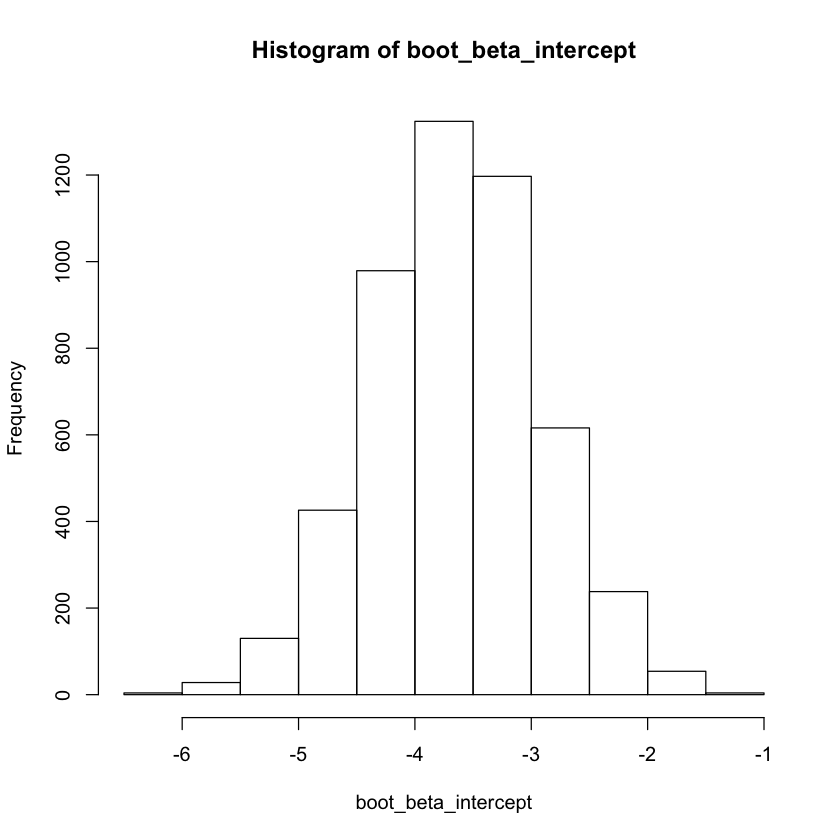

(Intercept) 
  -3.632225

[1] -3.646869

Flanker_Unadj 
   0.03091759

[1] 0.03104489

[1] -3.604261

[1] -3.689476

[1] 0.03142347

[1] 0.03066631

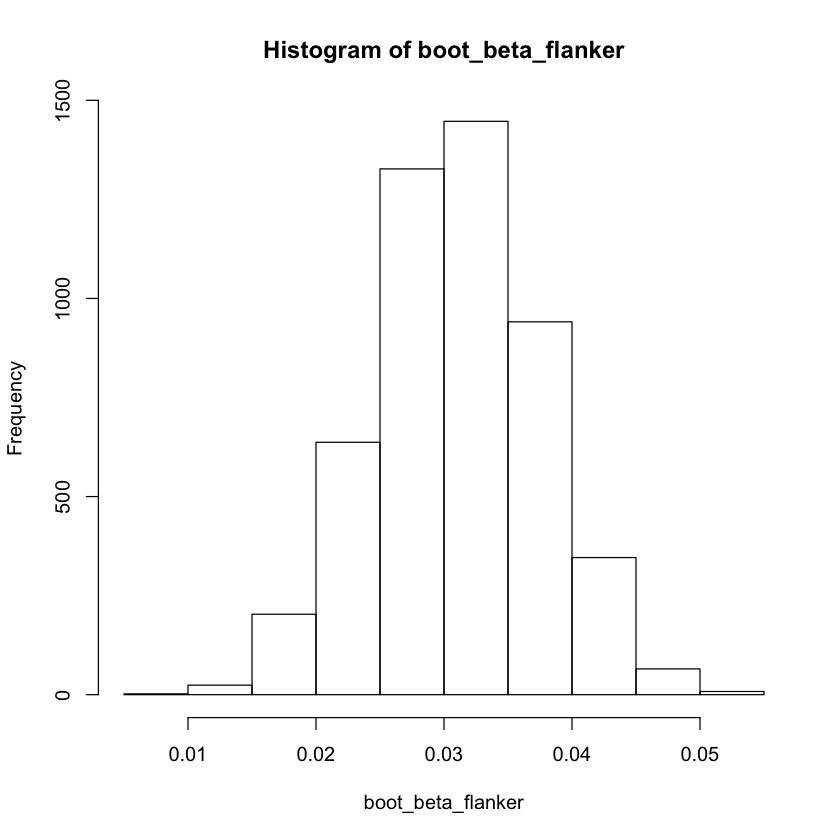

In [3]:
# -------------------------------
# Question 5
# -------------------------------
library(ISLR)
real_beta_intercept = glm(Gender~Flanker_Unadj, data=d1, family = binomial)$coefficients[1]
real_beta_flanker = glm(Gender~Flanker_Unadj, data=d1, family = binomial)$coefficients[2]
n = dim(d1)[1]
boot_beta_intercept = matrix(NaN, nrow=5000)
boot_beta_flanker = matrix(NaN, nrow=5000)
for (i in 1:5000){
  indx = sample_n(d1, n, replace=TRUE)
  boot_beta_intercept[i] = glm(Gender~Flanker_Unadj, data=indx, family = binomial)$coefficients[1]
  boot_beta_flanker[i] = glm(Gender~Flanker_Unadj, data=indx, family = binomial)$coefficients[2]
}
hist(boot_beta_intercept)
hist(boot_beta_flanker)

# We can compare the mean of the bootstrap with the original effet
real_beta_intercept # OG regression model
mean(boot_beta_intercept) # Mean of the bootstrap

real_beta_flanker # OG regression model
mean(boot_beta_flanker) # Mean of the bootstrap

# we  caluclate the confidence intervals
s = sd(boot_beta_intercept)
m  = mean(boot_beta_intercept)
error = qnorm(1-.025) * s/sqrt(n)
upper_bound = m + error
upper_bound
lower_bound = m - error
lower_bound

s = sd(boot_beta_flanker)
m  = mean(boot_beta_flanker)
error = qnorm(1-.025) * s/sqrt(n)
upper_bound = m + error
upper_bound
lower_bound = m - error
lower_bound


# Using confifence intervals of 95%, neither intervals for values of the intercpet or coefficient or Flanker_Unadj 
# cross 0, suggesting that we are 95% confident that neither value is = to 0